<a href="https://colab.research.google.com/github/sundarjhu/AstrostatsIRyA2023/blob/main/Statistics_For_Astronomers_20230906.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence intervals
#### Confidence intervals are a way of performing inference on unknown parameter values by computing estimates for them and providing intervals of probability around these estimates.

#### We will learn to interpret (and make!) statements of the type "The mass of the galaxy was found to be $(1.5\pm 0.2)\times 10^{9}$ M$_\odot$".

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

### First, let's interpret the 68\% confidence interval.
##### 1) Draw 10 numbers from a Standard Normal, then use these to compute a 68\% CI.
##### 2) Check if the true mean (0) lies within this CI.
##### 3) Repeat (1) and (2) 1000 times, and print out the fraction of these CIs that enclose/trap the true mean.

In [46]:
x = norm.rvs(size=(10, 1000))
number_of_sigmas = 2
xbar = x.mean(axis=0) # we now have 1000 sample means
CI = [(xb-number_of_sigmas/np.sqrt(10), xb+number_of_sigmas/np.sqrt(10)) for xb in xbar]
flag = [ci[0]<= 0 <= ci[1] for ci in CI]
print(f"Of the {len(CI)} intervals, {len(np.nonzero(flag)[0])}"
f" ({np.round(100*len(np.nonzero(flag)[0])/len(CI), decimals=1)}%) contain the true mean.")


Of the 1000 intervals, 965 (96.5%) contain the true mean.


##### Here's a graphical illustration of the procedure above for a 50\% CI, computed 20 times. Blue intervals (there are exactly 50\% of them in this case) trap the true mean $\mu$. [Credit: WikiMedia/FRuDIxAFLG]
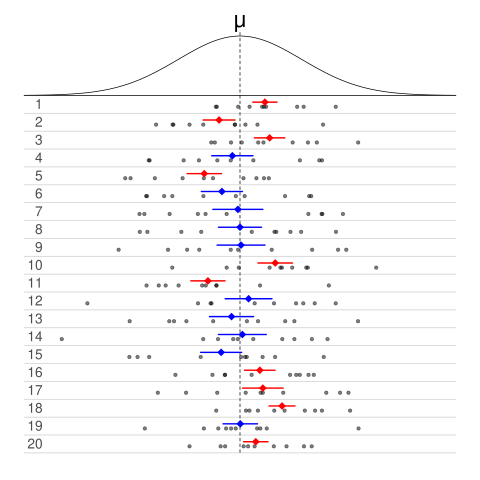

### Problem 1: 5 observations of the $V$-band flux of a star result in values 10.2, 10.7, 9.75, 10.1, and 9.8 Jy. The uncertainty in each flux measurement is known to be 0.35 Jy. Compute a 95\% confidence interval for the $V$-band flux of the star.

In [67]:
sigma = 0.3 # population standard deviation provided in the problem

x = np.array([10.2, 10.7, 9.75, 10.1, 9.8])
xbar = x.mean()
xstd = x.std(ddof=1) # unbiased sample standard deviation
N = len(x)
dof = N-1

# Since sigma is known, we can use the Normal distribution to compute the CI
CI = [np.round(xbar + limit * sigma/np.sqrt(N), decimals=2) for limit in norm.interval(0.95)]
print(f"Using the population standard deviation value of {sigma}.")
print(f"The 95% confidence interval for the true mean is {CI}")

Using the population standard deviation value of 0.3.
The 95% confidence interval for the true mean is [9.85, 10.37]


### Problem 2: 5 observations of the $V$-band flux of a star result in values 10.2, 10.7, 9.75, 10.1, and 9.8 Jy. Compute a 95\% confidence interval for the $V$-band flux of the star.

In [68]:
# The population standard deviation is unknown, so we must estimate it from the data.

x = np.array([10.2, 10.7, 9.75, 10.1, 9.8])
xbar = x.mean()
xstd = x.std(ddof=1) # unbiased sample standard deviation
N = len(x)
dof = N-1

# Since sigma is estimated, we must use the Student's t distribution to compute the CI
CI = [np.round(xbar + limit * xstd/np.sqrt(N), decimals=2) for limit in t.interval(0.95, dof)]
print(f"Using an estimate of {np.round(xstd, decimals=2)} for the population standard deviation.")
print(f"The 95% confidence interval for the true mean is {CI}")

Using an estimate of 0.38 for the population standard deviation.
The 95% confidence interval for the true mean is [9.64, 10.58]


##### Note that the 95\% CI is wider when the population standard deviation is not known!

### Problem 3: A region of the sky observed by a telescope registers a flux of 15 µJy. The background noise for the same region is assumed to be Gaussian with a standard deviation of 5 µJy. What is the probability that the detection is just noise?

In [72]:
# All fluxes are in µJy
mu = 0
sigma = 5

# How much of a deviation is this detection from the mean of the Gaussian?
f = 15
dev = (f - mu)
# Deviation in units of the standard deviation
rel_dev = dev / sigma
print(f"Deviation in number of standard deviations: {rel_dev}")

# What is the probability of obtaining random noise with AT LEAST this
# amount of deviation from the mean?
# We want P(Z > rel_dev) = 1 - P(Z <= rel_dev) \equiv 1 - CDF(rel_dev)
# Note, the deviation must be POSITIVE as it is a physical quantity (right-tailed).
print(f"Probability that detection is only due to noise: {1 - norm.cdf(rel_dev)}")

Deviation in number of standard deviations: 3.0
Probability that detection is only due to noise: 0.0013498980316301035


### Problem 4: A star whose flux is known to be constant at 4±0.2 Jy. What is the probability that a single observation of the star results in a flux outside the range [3.3 Jy, 4.3 Jy]?

In [75]:
# We need P(Z <= 3.3 OR Z >= 4.3) = P(Z <= 3.3) + P(Z >= 4.3) = CDF(3.3) + 1 - CDF(4.3)
P1 = norm.cdf(3.3, loc=4, scale=0.2)
P2 = norm.cdf(4.3, loc=4, scale=0.2)
print(f"The required probability is {np.round(P1+1-P2, decimals=2)}")

The required probability is 0.07


##### The typical two-tailed threshold for "extreme" occurrences is 5\%. Since the above value is higher, it is still reasonably likely that a flux outside this interval could just be due to random variations in the star's flux.